In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("reviews.csv") 

In [3]:
df.shape

(1000, 2)

In [4]:
df.sample(5)

,Description,Is_Response
715,The BEST valets anywhere! This is the best hot...,happy
210,We had a wonderful stay at this hotel. When we...,happy
3,Stayed here with husband and sons on the way t...,happy
352,"I had never heard of Club Quarters before, but...",happy
202,We chose the Argonaut because we got a great s...,happy


In [5]:
# Remove all rows with null values
df.dropna(axis=0, inplace=True)

In [6]:
df.shape

(1000, 2)

In [7]:
# Change Is_Response to 0 for no happy and 1 for happy
df['Is_Response'].replace(['happy','not happy'],[1,0], inplace=True)

In [8]:
df.head()

,Description,Is_Response
0,The room was kind of clean but had a VERY stro...,0
1,I stayed at the Crown Plaza April -- - April -...,0
2,I booked this hotel through Hotwire at the low...,0
3,Stayed here with husband and sons on the way t...,1
4,My girlfriends and I stayed here to celebrate ...,0


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [10]:
X = df['Description']
y = df['Is_Response']

In [46]:
# tf-idf means term-frequency times inverse document-frequency. 
tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
tfidf.fit(X)
features = tfidf.transform(X)

In [47]:
features.shape

(1000, 8212)

In [48]:
type(features)

scipy.sparse.csr.csr_matrix

In [49]:
features.toarray()[550:560,1000:1020]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.08939428, 0

In [50]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=20)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [52]:
clf = LogisticRegression().fit(X_train,y_train)

In [53]:
### Train accuracy
clf.score(X_train,y_train)

0.8925

In [54]:
y_pred = clf.predict(X_test)
print("Accuracy Score:",clf.score(X_test,y_test))  

Accuracy Score: 0.79


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 28  42]
 [  0 130]]


In [56]:
from sklearn.metrics import classification_report
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        70
           1       0.76      1.00      0.86       130

    accuracy                           0.79       200
   macro avg       0.88      0.70      0.72       200
weighted avg       0.84      0.79      0.76       200



Text(0.5, 15.0, 'Predicted')

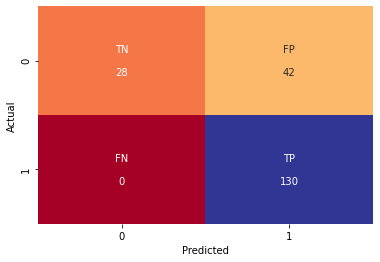

In [57]:
group_counts = [f"{value:0.0f}" for value in  cm.flatten()]
group_names = ['TN','FP', 'FN','TP']
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.array(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", cmap='RdYlBu',cbar=False)
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")

### Predict for new data

In [61]:
# Predict whether the given review is positive or negative 
docs = ["This is very good",
        "Bad room service",
        "Food was awesome"]
# Tfidf
features = tfidf.transform(docs)
print(features.shape)
print(clf.predict(features))

(3, 8212)
[1 0 1]


## Text classification using BernoulliNB

In [64]:
# tf-idf means term-frequency times inverse document-frequency. 
tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words = 'english')
features = tfidf.fit_transform(X).toarray()

In [65]:
features.shape

(1000, 8212)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=20)

In [67]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB().fit(X_train,y_train)

In [68]:
bnb.score(X_train,y_train)

0.84375

In [69]:
y_pred = bnb.predict(X_test)
print("Accuracy Score:",bnb.score(X_test,y_test))  

Accuracy Score: 0.745


[[ 28  42]
 [  9 121]]


Text(0.5, 15.0, 'Predicted')

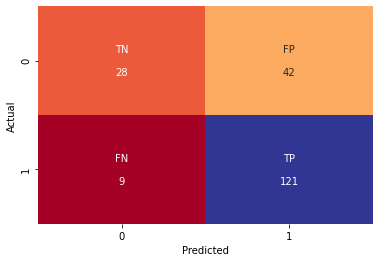

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
group_counts = [f"{value:0.0f}" for value in  cm.flatten()]
group_names = ['TN','FP', 'FN','TP']
labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.array(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", cmap='RdYlBu',cbar=False)
ax.set_ylabel("Actual")
ax.set_xlabel("Predicted")